# Herleitung der HTM für Standardmanipulatoren über DH-Parameter

## (1) Kartesischer Manipulator

Folgende Bibliotheken, Funktionen und Konstanten werden genutzt:

In [1]:
from matplotlib import pyplot as plt
from numpy.linalg import inv
from IPython import display
import numpy as np
import math




PI = 3.1415926535

def plot4x4Mat(m):
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[0,0],m[0,1],m[0,2],m[0,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[1,0],m[1,1],m[1,2],m[1,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[2,0],m[2,1],m[2,2],m[2,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[3,0],m[3,1],m[3,2],m[3,3]))
    
def DH4x4(T,A,a,d):
    H = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]);    
    
    H[0,0] =  math.cos(T);
    H[0,1] = -math.sin(T)*math.cos(A);
    H[0,2] =  math.sin(T)*math.sin(A);
    H[0,3] = a*math.cos(T);
    
    H[1,0] = math.sin(T);
    H[1,1] = math.cos(T)*math.cos(A);
    H[1,2] = -math.cos(T)*math.sin(A);
    H[1,3] = a*math.sin(T);
    
    H[2,0] = 0;
    H[2,1] = math.sin(A);
    H[2,2] = math.cos(A);
    H[2,3] = d;
    
    return H;

### (I) Kinematisches Model des Roboters

#### (I.1) Der Roboter

#### (I.2) Kinematische Struktur und Parameter

Die wesentlichen Parameter des Kartesischen-Roboters sind die drei Translationsgelenke. $\dots$ Siehe Übung am 27. Nov. 2025.

In [2]:
L0 = 1
L1 = 1
L2 = 1
s0 = 0
s1 = 0
s2 = 0

### (II) Herleitung der HTM

#### (II.1) DH-Parameter

**$\Phi_n$** ... Rotation des Koordinaten-
systems $(n-1)$ um $z_{n-1}$ damit $x_{n-1}$ und $x_n$
die gleiche Orientierung besitzen
Θn 

**$\mathrm{A}_n$** ... Rotation des Koordinatensystem $(n-1)$ um $x_n$
damit $z_{n-1}$ und $z_n$ die gleiche Orientierung besitzen


**$r_n$** ... Abstand zwischen Urspung von Koordinatensystem $n$ und $(n-1)$
relativ zu $x_n$

**$d_n$** ... Abstand zwischen Urspung von Koordinatensystem $n$ und $(n-1)$ relativ zu $z_{n-1}$

 $$   
    \begin{array}{c || c|c|c|c}       
       n & \Phi_n &  \mathrm{A}_n &  r_n & d_n \\ 
        \hline
      1 &  \pi  & -\frac{\pi}{2} & 0  &  L_0+s_0 \\
      2 &  \frac{\pi}{2}  & -\frac{\pi}{2} & 0  &  L_1 + s_1 \\       
      3 &  0 & 0 & 0  & L_2 + s_2 \\
    \end{array}
 $$

#### (II.2) HTMs

In [3]:
DH_PHI_1 = PI
DH_ALPHA_1 = -PI/2
DH_a_1 = 0
DH_d_1 = L0+s0

T_1_0 = DH4x4(DH_PHI_1,DH_ALPHA_1,DH_a_1,DH_d_1)

DH_PHI_2 = PI/2
DH_ALPHA_2 = -PI/2
DH_a_2 = 0
DH_d_2 = L1+s1
T_2_1 = DH4x4(DH_PHI_2,DH_ALPHA_2,DH_a_2,DH_d_2)

DH_PHI_3 = 0
DH_ALPHA_3 = 0
DH_a_3 = 0
DH_d_3 = L2+s2
T_3_2 = DH4x4(DH_PHI_3,DH_ALPHA_3,DH_a_3,DH_d_3)

In [4]:
T_2_0 =   T_1_0 @ T_2_1 
T_3_0 =   T_2_0 @ T_3_2

In [5]:
T_3_0

array([[ 0,  0,  1,  1],
       [ 0,  1,  0, -1],
       [-1,  0,  0,  1],
       [ 0,  0,  0,  1]])

### (III) Übung

In [6]:
x = np.array([0,0,T_1_0[0,3],T_2_0[0,3],T_3_0[0,3]],np.float32)
y = np.array([0,0,T_1_0[1,3],T_2_0[1,3],T_3_0[1,3]],np.float32)
z = np.array([0,0,T_1_0[2,3],T_2_0[2,3],T_3_0[2,3]],np.float32)

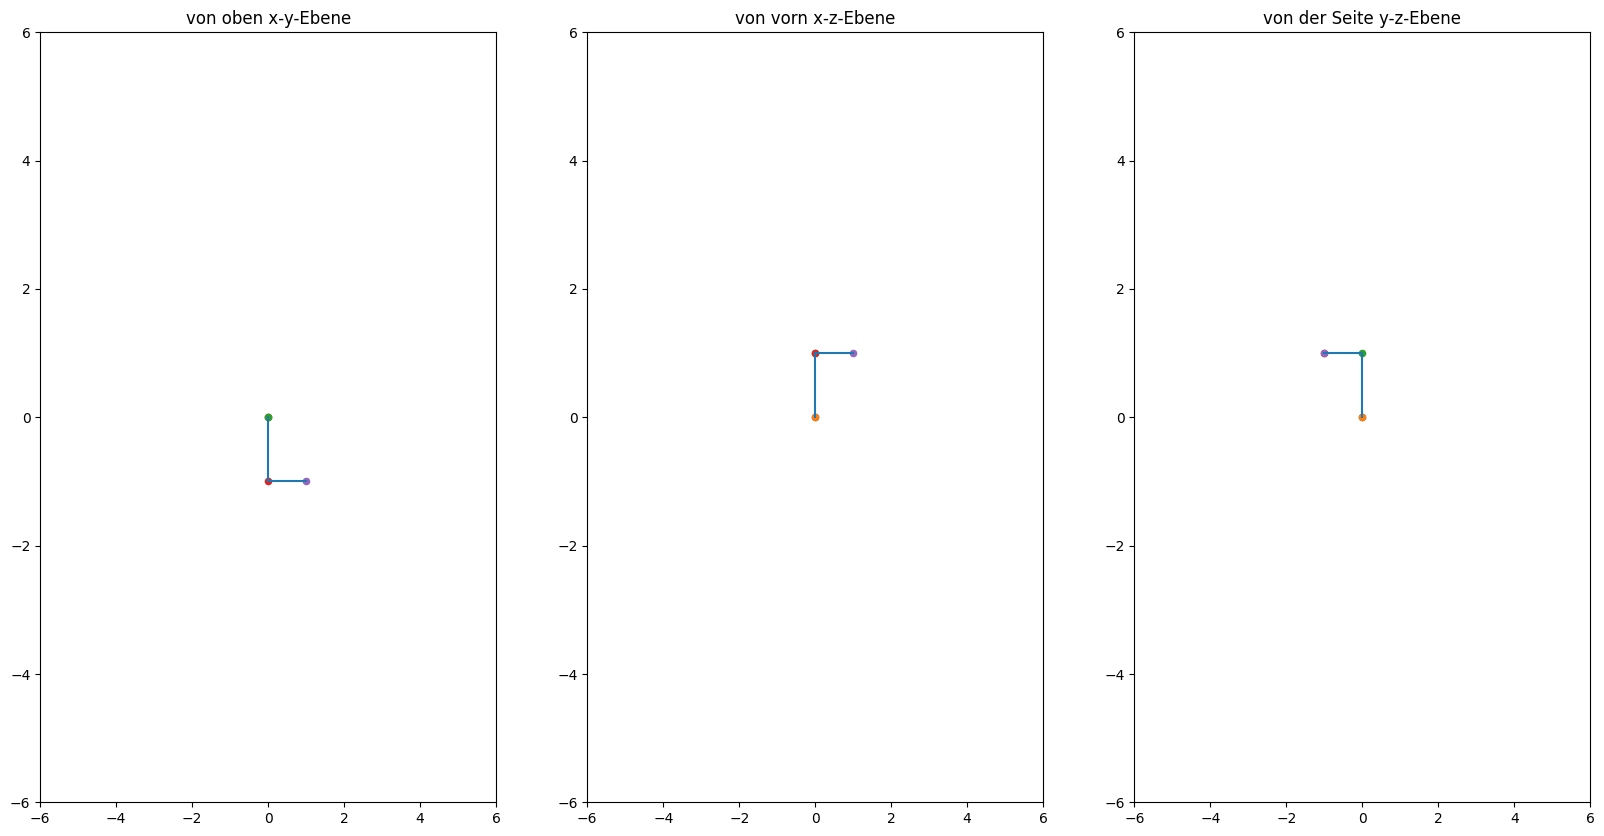

In [7]:
plt.subplots(1,3,figsize=(20,10))

plt.subplot(1,3,1)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.title("von oben x-y-Ebene")
plt.scatter(  x[0] ,y[0], s = 20 )
plt.scatter(  x[1], y[1], s = 20 )
plt.scatter(  x[2], y[2], s = 20 )
plt.scatter(  x[3], y[3], s = 20 )
plt.scatter(  x[4], y[4], s = 20 )
plt.plot(x,y);

plt.subplot(1,3,2)
plt.xlim(-6, 6)
plt.ylim(-6, 6)


plt.title("von vorn x-z-Ebene")
plt.scatter(  x[0] ,z[0], s = 20 )
plt.scatter(  x[1], z[1], s = 20 )
plt.scatter(  x[2], z[2], s = 20 )
plt.scatter(  x[3], z[3], s = 20 )
plt.scatter(  x[4], z[4], s = 20 )
plt.plot(x,z);

plt.subplot(1,3,3)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.title("von der Seite y-z-Ebene")
plt.scatter(  y[0] ,z[0], s = 20 )
plt.scatter(  y[1], z[1], s = 20 )
plt.scatter(  y[2], z[2], s = 20 )
plt.scatter(  y[3], z[3], s = 20 )
plt.scatter(  y[4], z[4], s = 20 )


plt.plot(y,z);

Text(0.5, 0.5, 'Y Label')

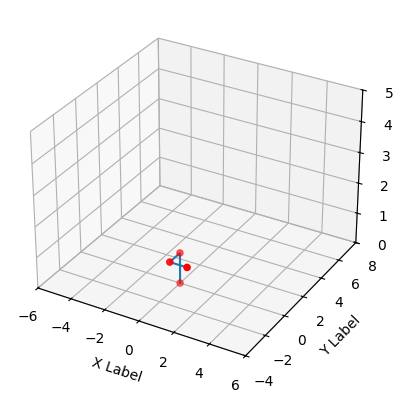

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-6, 6)
ax.set_ylim(-4, 8)
ax.set_zlim(0, 5)
ax.scatter(x, y, z, c='r', marker='o')
ax.plot(x,y,z);
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

